In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
import statsmodels.api as sm
from patsy import dmatrices

In [308]:
datos = pd.read_csv('/Users/rebecaangulorojas/Dropbox/Mi Mac (Rebeca’s MacBook Air)/Documents/ITAM.20/DecimoSemestre/Estadistica-Aplicada-I/Control/datosFit.csv')

In [309]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carid        140 non-null    int64  
 1   vehicle      140 non-null    object 
 2   year         140 non-null    int64  
 3   msrp         140 non-null    float64
 4   accelrate    140 non-null    float64
 5   mpg          140 non-null    float64
 6   mpgmpge      140 non-null    float64
 7   carclass     140 non-null    object 
 8   carclass_id  140 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 10.0+ KB


In [310]:
len(datos)

140

In [311]:
datos.columns

Index(['carid', 'vehicle', 'year', 'msrp', 'accelrate', 'mpg', 'mpgmpge',
       'carclass', 'carclass_id'],
      dtype='object')

# Selección de variables para el modelo

In [312]:
def split_vehicle(model):
    lista = model.split()[0]
    return lista
datos['vehicle_model'] = datos['vehicle'].apply(split_vehicle)

In [313]:
datos.drop(['carid','carclass_id','vehicle'],axis = 1, inplace = True)

In [314]:
datos.columns

Index(['year', 'msrp', 'accelrate', 'mpg', 'mpgmpge', 'carclass',
       'vehicle_model'],
      dtype='object')

In [315]:
y, X = dmatrices('msrp ~ year + mpg + mpgmpge + accelrate + vehicle_model + carclass', data=datos, return_type='dataframe')

# prediction

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html#statsmodels.regression.linear_model.PredictionResults

In [316]:
from statsmodels.formula.api import ols


In [317]:
modelo_completo_1 = ols('msrp ~ year + mpg + mpgmpge + accelrate + vehicle_model + carclass',data=datos).fit()
modelo_completo_2 = ols('msrp ~ year + mpg + mpgmpge + accelrate + carclass',data=datos).fit()

In [318]:
table = sm.stats.anova_lm(modelo_completo_2, typ=2)
print(table)

                 sum_sq     df          F        PR(>F)
carclass   6.109511e+09    6.0   5.412191  5.104647e-05
year       2.204070e+08    1.0   1.171503  2.811117e-01
mpg        1.403969e+09    1.0   7.462350  7.183283e-03
mpgmpge    1.479710e+08    1.0   0.786492  3.768132e-01
accelrate  1.055700e+10    1.0  56.112374  9.574673e-12
Residual   2.427011e+10  129.0        NaN           NaN


In [319]:
print(modelo_completo_2.model.formula)

msrp ~ year + mpg + mpgmpge + accelrate + carclass


In [320]:
modelo_completo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     11.32
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.29e-19
Time:                        17:50:58   Log-Likelihood:                -1413.1
No. Observations:                 140   AIC:                             2974.
Df Residuals:                      66   BIC:                             3192.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1.409e+06   7.47e+05      1.885      0.064   -8.31e+04     2.9e+06
vehicle_model[T.A5]             -4.044e+04   1.45e+04     -2.789      0.007   -6.94e+04   -1.15e+04
vehicle_model[T.Accord]         -6.868e+04    1.4e+04     -4.898      0.000   -9.67e+04   -4.07e+04
vehicle_model[T.ActiveHybrid]   -1.381e+04    1.2e+04     -1.146      0.256   -3.79e+04    1.02e+04
vehicle_model[T.Altima]         -5.155e+04   1.22e+04     -4.233      0.000   -7.59e+04   -2.72e+04
vehicle_model[T.Ampera]         -3.707e+04   1.45e+04     -2.564      0.013   -6.59e+04   -8203.387
vehicle_model[T.Aspen]          -3.502e+04   1.46e+04     -2.402      0.019   -6.41e+04   -5912.210
vehicle_model[T.Audi]           -3.784e+04   1.37e+04     -2.769      0.007   -6.51e+04   -1.06e+04
vehicle_model[T.Aura]           -4.677e+04   1.44e+04     -3.237      0.002   -7.56e+04   -1.79e+04
vehicle_model[T.Auris]           2794.1832   1.23e+04      0.228      0.821   -2.17e+04    2.73e+04
vehicle_model[T.Avante/Elantra] -2.949e+04   1.28e+04     -2.306      0.024    -5.5e+04   -3951.941
vehicle_model[T.Besturn]        -3.619e+04   1.51e+04     -2.390      0.020   -6.64e+04   -5958.613
vehicle_model[T.Buick]          -4.311e+04   1.45e+04     -2.969      0.004   -7.21e+04   -1.41e+04
vehicle_model[T.C-Max]          -4.286e+04   1.25e+04     -3.422      0.001   -6.79e+04   -1.79e+04
vehicle_model[T.CR-Z]           -3.552e+04   1.51e+04     -2.357      0.021   -6.56e+04   -5432.271
vehicle_model[T.CT]             -1.688e+04    1.3e+04     -1.302      0.197   -4.28e+04    9000.764
vehicle_model[T.Cadillac]        1.557e+04   1.49e+04      1.048      0.299   -1.41e+04    4.52e+04
vehicle_model[T.Camry]          -4.035e+04   1.11e+04     -3.644      0.001   -6.25e+04   -1.82e+04
vehicle_model[T.Cayenne]        -1.859e+04    1.3e+04     -1.434      0.156   -4.45e+04    7285.955
vehicle_model[T.Chevrolet]      -2.797e+04   1.21e+04     -2.316      0.024   -5.21e+04   -3857.144
vehicle_model[T.Civic]          -2.438e+04   1.05e+04     -2.323      0.023   -4.53e+04   -3426.583
vehicle_model[T.Crown]           7095.5757   1.41e+04      0.504      0.616    -2.1e+04    3.52e+04
vehicle_model[T.E400]            -2.47e+04   1.44e+04     -1.717      0.091   -5.34e+04    4029.782
vehicle_model[T.ES]             -2.487e+04   1.34e+04     -1.861      0.067   -5.16e+04    1814.807
vehicle_model[T.Escalade]        4298.6023    1.5e+04      0.287      0.775   -2.56e+04    3.42e+04
vehicle_model[T.Escape]         -3.743e+04    1.2e+04     -3.126      0.003   -6.13e+04   -1.35e+04
vehicle_model[T.Estima]         -3915.3266   7602.190     -0.515      0.608   -1.91e+04    1.13e+04
vehicle_model[T.F3DM]           -4.939e+04   1.41e+04     -3.500      0.001   -7.76

In [321]:
modelo_completo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     21.56
Date:                Mon, 02 May 2022   Prob (F-statistic):           4.01e-23
Time:                        17:51:01   Log-Likelihood:                -1526.6
No. Observations:                 140   AIC:                             3075.
Df Residuals:                     129   BIC:                             3108.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         8.54e+05   7.82e+05      1.093      0.277   -6.92e+05     2.4e+06
carclass[T.L]    2.609e+04   6714.191      3.885      0.000    1.28e+04    3.94e+04
carclass[T.M]   -3778.5035   3544.228     -1.066      0.288   -1.08e+04    3233.839
carclass[T.MV]   1.165e+04   8490.498      1.372      0.173   -5151.580    2.84e+04
carclass[T.PT]  -5016.5885   7693.742     -0.652      0.516   -2.02e+04    1.02e+04
carclass[T.SUV]   162.5284   4414.863      0.037      0.971   -8572.386    8897.443
carclass[T.TS]  -8005.2528   6033.381     -1.327      0.187   -1.99e+04    3931.939
year             -422.1104    389.991     -1.082      0.281   -1193.717     349.496
mpg              -494.7215    181.102     -2.732      0.007    -853.036    -136.407
mpgmpge            76.0343     85.736      0.887      0.377     -93.596     245.665
accelrate        4051.0826    540.806      7.491      0.000    2981.084    5121.081
==============================================================================
Omnibus:                       28.441   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.471
Skew:                           0.831   Prob(JB):                     1.00e-14
Kurtosis:                       5.879   Cond. No.                     1.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FeedForward

evaluation metric:  optimize adjusted R-squared 

# Análisis del residuo

In [322]:
influence = modelo_completo_1.get_influence()
#residuos_train = influence.resid_studentized_internal
residuos_train = modelo_completo_1.resid
prediccion_train = modelo_completo_1.predict(datos)

/var/folders/4m/nnq1bkcd45sgtjlfxsxb336c0000gn/T/ipykernel_8795/802080835.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
/Users/rebecaangulorojas/opt/miniconda3/envs/control_EA/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Diagnóstico residuos')

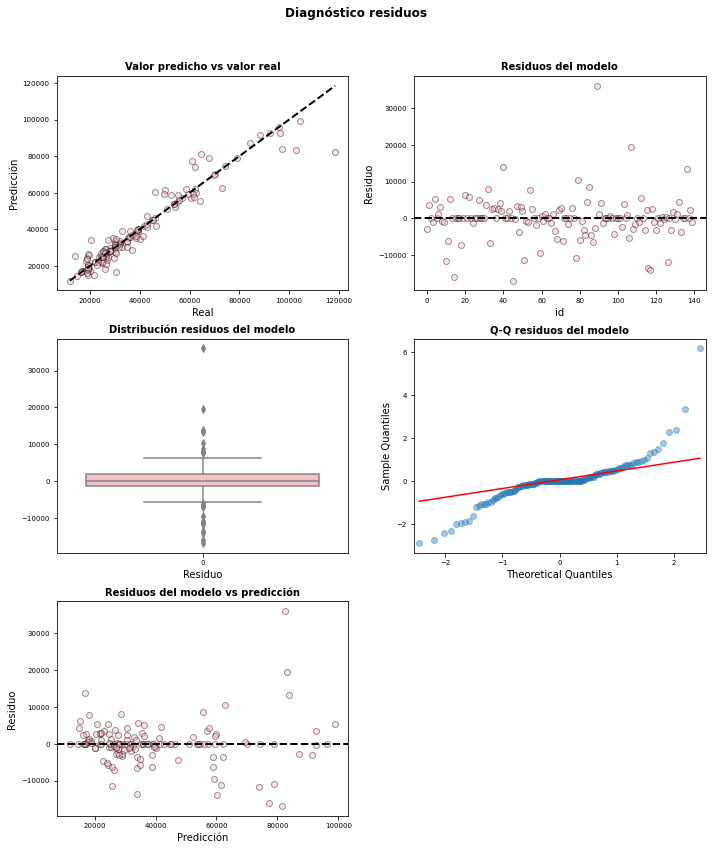

In [323]:
influence = modelo_completo_1.get_influence()
#residuos_train = influence.resid_studentized_internal
residuos_train = modelo_completo_1.resid
prediccion_train = modelo_completo_1.predict(datos)
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

axes[0, 0].scatter(y, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4,color = '#FFB7C5')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4, color = '#FFB7C5')
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.boxplot(
    data    = residuos_train,
    color   = "#FFB7C5",
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = '#FFB7C5',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,color = '#FFB7C5',
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

In [324]:
import statsmodels.formula.api as smf

In [325]:
def forward_selected(data, response):
    
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [326]:
#datos.drop(['carid','carclass_id','vehicle'],axis=1)
datos.columns

Index(['year', 'msrp', 'accelrate', 'mpg', 'mpgmpge', 'carclass',
       'vehicle_model'],
      dtype='object')

In [327]:
best_model = forward_selected(datos[['year', 'msrp', 'accelrate', 'mpgmpge', 'carclass','vehicle_model']],'msrp')

In [328]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     10.21
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.56e-18
Time:                        17:52:02   Log-Likelihood:                -1421.6
No. Observations:                 140   AIC:                             2989.
Df Residuals:                      67   BIC:                             3204.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         1.91e+06   7.67e+05      2.489      0.015    3.78e+05    3.44e+06
vehicle_model[T.A5]             -2.648e+04   1.44e+04     -1.833      0.071   -5.53e+04    2350.320
vehicle_model[T.Accord]         -5.422e+04   1.38e+04     -3.917      0.000   -8.18e+04   -2.66e+04
vehicle_model[T.ActiveHybrid]    4545.7513   1.08e+04      0.419      0.677   -1.71e+04    2.62e+04
vehicle_model[T.Altima]         -3.922e+04   1.21e+04     -3.254      0.002   -6.33e+04   -1.52e+04
vehicle_model[T.Ampera]         -1.548e+04   1.31e+04     -1.181      0.242   -4.17e+04    1.07e+04
vehicle_model[T.Aspen]          -1.682e+04   1.39e+04     -1.209      0.231   -4.46e+04    1.09e+04
vehicle_model[T.Audi]           -2.703e+04   1.39e+04     -1.947      0.056   -5.47e+04     678.886
vehicle_model[T.Aura]           -2.962e+04   1.39e+04     -2.127      0.037   -5.74e+04   -1819.998
vehicle_model[T.Auris]           -662.6383   1.29e+04     -0.051      0.959   -2.64e+04    2.51e+04
vehicle_model[T.Avante/Elantra] -1.822e+04   1.29e+04     -1.416      0.161   -4.39e+04    7455.864
vehicle_model[T.Besturn]        -1.932e+04   1.48e+04     -1.308      0.195   -4.88e+04    1.02e+04
vehicle_model[T.Buick]          -2.474e+04   1.38e+04     -1.791      0.078   -5.23e+04    2827.902
vehicle_model[T.C-Max]          -2.955e+04   1.23e+04     -2.401      0.019   -5.41e+04   -4980.852
vehicle_model[T.CR-Z]           -1.251e+04   1.36e+04     -0.923      0.359   -3.96e+04    1.46e+04
vehicle_model[T.CT]             -4658.5158   1.29e+04     -0.360      0.720   -3.05e+04    2.12e+04
vehicle_model[T.Cadillac]        3.441e+04   1.41e+04      2.436      0.018    6211.224    6.26e+04
vehicle_model[T.Camry]          -2.989e+04   1.11e+04     -2.703      0.009    -5.2e+04   -7821.129
vehicle_model[T.Cayenne]        -1917.8085   1.23e+04     -0.156      0.876   -2.64e+04    2.26e+04
vehicle_model[T.Chevrolet]      -7252.1731   1.03e+04     -0.703      0.485   -2.78e+04    1.33e+04
vehicle_model[T.Civic]          -1.391e+04   1.04e+04     -1.336      0.186   -3.47e+04    6862.854
vehicle_model[T.Crown]           1.936e+04   1.42e+04      1.365      0.177   -8948.557    4.77e+04
vehicle_model[T.E400]           -6908.0535   1.38e+04     -0.502      0.617   -3.44e+04    2.05e+04
vehicle_model[T.ES]             -1.434e+04   1.36e+04     -1.056      0.295   -4.14e+04    1.28e+04
vehicle_model[T.Escalade]         2.43e+04    1.4e+04      1.730      0.088   -3730.119    5.23e+04
vehicle_model[T.Escape]         -2.467e+04   1.18e+04     -2.097      0.040   -4.81e+04   -1187.570
vehicle_model[T.Estima]          -810.3607   7940.884     -0.102      0.919   -1.67e+04     1.5e+04
vehicle_model[T.F3DM]           -2.669e+04   1.24e+04     -2.147      0.035   -5.15

In [404]:
datos_validacion = pd.read_csv('/Users/rebecaangulorojas/Dropbox/Mi Mac (Rebeca’s MacBook Air)/Documents/ITAM.20/DecimoSemestre/Estadistica-Aplicada-I/Control/datosFin.csv')

In [405]:
datos_validacion['vehicle_model'] = datos_validacion['vehicle'].apply(split_vehicle)
datos_validacion.drop(['carid','carclass_id','vehicle'],axis = 1, inplace = True)


In [409]:
datos

,year,msrp,accelrate,mpg,mpgmpge,carclass,vehicle_model
0,2013,84300.00,18.18,25.00,25.00,L,ActiveHybrid
1,2009,60519.83,12.60,23.99,23.99,SUV,ML450
2,2008,62290.38,8.70,37.16,37.16,M,Crown
3,2008,23744.06,9.52,30.11,85.00,M,F3DM
4,2010,104300.43,20.41,22.11,22.11,L,ActiveHybrid
...,...,...,...,...,...,...,...
135,2010,27968.32,12.35,29.00,29.00,SUV,Tribute
136,2009,97237.90,17.96,18.82,18.82,SUV,ActiveHybrid
137,2010,30194.95,11.63,32.00,32.00,SUV,Mariner
138,2012,18555.28,9.42,42.00,42.00,C,Insight


In [408]:
datos_validacion


,year,msrp,accelrate,mpg,mpgmpge,carclass,vehicle_model
0,2013,84300.00,18.18,25.00,25.00,L,ActiveHybrid
1,2009,60519.83,12.60,23.99,23.99,SUV,ML450
2,2008,62290.38,8.70,37.16,37.16,M,Crown
3,2008,23744.06,9.52,30.11,85.00,M,F3DM
4,2010,104300.43,20.41,22.11,22.11,L,ActiveHybrid
...,...,...,...,...,...,...,...
135,2010,27968.32,12.35,29.00,29.00,SUV,Tribute
136,2009,97237.90,17.96,18.82,18.82,SUV,ActiveHybrid
137,2010,30194.95,11.63,32.00,32.00,SUV,Mariner
138,2012,18555.28,9.42,42.00,42.00,C,Insight


In [415]:
#influence = best_model.get_influence()
#residuos_train = influence.resid_studentized_internal
#residuos_train = best_model.resid

modelo_sin_extremos = ols('msrp ~ year + mpgmpge + accelrate + vehicle_model + carclass',data=datos_sin_extremos).fit()
#prediccion = modelo_sin_extremos.predict(datos_validacion)
modelo_sin_extremos.predict(datos_sin_extremos)
#prediccion_train = modelo_completo_1.predict(datos)

0      90463.463859
1      57827.097056
2      62290.380000
3      24502.058088
4      98136.966141
           ...     
135    26375.088231
136    88089.100583
137    30194.950000
138    17055.542197
139    28078.149962
Length: 135, dtype: float64

In [416]:
datos_sin_extremos

,year,msrp,accelrate,mpg,mpgmpge,carclass,vehicle_model
0,2013,84300.00,18.18,25.00,25.00,L,ActiveHybrid
1,2009,60519.83,12.60,23.99,23.99,SUV,ML450
2,2008,62290.38,8.70,37.16,37.16,M,Crown
3,2008,23744.06,9.52,30.11,85.00,M,F3DM
4,2010,104300.43,20.41,22.11,22.11,L,ActiveHybrid
...,...,...,...,...,...,...,...
135,2010,27968.32,12.35,29.00,29.00,SUV,Tribute
136,2009,97237.90,17.96,18.82,18.82,SUV,ActiveHybrid
137,2010,30194.95,11.63,32.00,32.00,SUV,Mariner
138,2012,18555.28,9.42,42.00,42.00,C,Insight


In [417]:
datos_validacion

,year,msrp,accelrate,mpg,mpgmpge,carclass,vehicle_model
0,2011,22850.87,9.35,50.00,50.00,C,Aqua
1,2013,24360.00,10.20,44.00,44.00,C,Civic
2,2010,34753.53,11.76,35.00,35.00,C,HS
3,2012,95283.85,17.54,25.00,25.00,L,Panamera
4,2012,59126.14,16.95,31.00,31.00,M,Lexus
5,2013,29015.00,12.20,29.00,29.00,M,Regal
6,2010,28287.66,14.70,37.00,37.00,M,Sonata
7,2013,31950.00,11.36,37.00,37.00,M,Optima
8,2011,27130.82,13.89,33.00,33.00,M,Camry
9,2003,38084.77,8.33,40.46,40.46,MV,Alphard


In [ ]:

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

axes[0, 0].scatter(y, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4,color = '#FFB7C5')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4, color = '#FFB7C5')
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.boxplot(
    data    = residuos_train,
    color   = "#FFB7C5",
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = '#FFB7C5',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,color = '#FFB7C5',
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

In [329]:
print(best_model.model.formula)

msrp ~ vehicle_model + accelrate + year + carclass + mpgmpge + 1


In [330]:
print(best_model.rsquared_adj)

0.8267168473153502


In [331]:
influence = best_model.get_influence()

# Normalidad de los errores

Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.
If it is far from zero, it signals the data do not have a normal distribution.

$\mathit{JB} = \frac{n}{6} \left( S^2 + \frac14 (K-3)^2 \right)$


where ''n'' is the number of observations (or degrees of freedom in general); ''S'' is the sample [[skewness]], K is the sample [[kurtosis]] :

$$
     S = \frac{ \hat{\mu}_3 }{ \hat{\sigma}^3 }
        = \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^3} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{3/2}} ,
$$
:
$$
 K = \frac{ \hat{\mu}_4 }{ \hat{\sigma}^4 }
    = \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^4} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{2}} ,
$$


where $\hat{\mu}_3$ and $\hat{\mu}_4$ are the estimates of third and fourth [[central moment]]s, respectively, $\bar{x}$ is the sample [[mean]], and $\hat{\sigma}^2$ is the estimate of the second central moment, the [[variance]].


In [114]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [115]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(best_model.resid)
lzip(name, test)

[('Jarque-Bera', 67.64908841887319),
 ('Chi^2 two-tail prob.', 2.0426177284400935e-15),
 ('Skew', 0.8734015190221299),
 ('Kurtosis', 5.9232970653650465)]

In [116]:
np.linalg.cond(best_model.model.exog)

389.50862310782827

# Heteroskedasticity tests


In [117]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(best_model.resid, best_model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 6.568688866692716),
 ('p-value', 0.5837991190460887),
 ('f-value', 0.806124733981148),
 ('f p-value', 0.5982952226092128)]

In [ ]:
# Goldfeld-Quandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

In [ ]:
# linearity
name = ["t value", "p value"]
test = sms.linear_harvey_collier(results)
lzip(name, test)

# Detección de observaciones atípicas e influyentes

# Análisis de Residuos
## detección de puntos extremos en las y´s
- Boxplot
- DFFITS: identificación de puntos influyentes en las predicciones, 

In [332]:
#modelo_completo = ols('msrp ~ mpg + accelrate + mpgmpge + carclass + year',data=datos).fit()
#y, X = dmatrices('msrp ~ mpg + accelrate + mpgmpge + carclass + year', data=datos, return_type='dataframe')

In [333]:
#fig = sm.graphics.influence_plot(modelo_completo, criterion="DFFITS")
#fig.tight_layout(pad=.5)

In [334]:
#fig = sm.graphics.plot_regress_exog(modelo_completo, "mpg")
#fig.tight_layout(pad=1.0)

In [335]:
#fig = sm.graphics.plot_fit(modelo_completo, "mpg")
#fig.tight_layout(pad=1.0)

In [336]:
#fig = sm.graphics.plot_leverage_resid2(modelo_completo)
#fig.tight_layout(pad=1.0)

In [337]:
#results = modelo_completo

DFFITS
- dffits measure for influence of an observation
- dfbetas

In [338]:
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.iolib.table import SimpleTable
influence = OLSInfluence(best_model)
influence.dfbetas

/Users/rebecaangulorojas/opt/miniconda3/envs/control_EA/lib/python3.10/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


array([[ 1.22881837e-02,  4.30288809e-03, -8.82001536e-03, ...,
         2.44495000e-02, -1.23259057e-02, -2.90514820e-02],
       [ 1.33122135e-02, -2.40228169e-03, -9.84662986e-05, ...,
        -7.95754422e-03, -1.32147618e-02,  9.14431546e-03],
       [ 2.54852680e-14, -3.08792089e-13, -3.42732554e-13, ...,
        -3.68334208e-13, -3.14276664e-14,  1.26163797e-12],
       ...,
       [-9.40527749e-14,  4.05510003e-14, -6.20282843e-14, ...,
         6.55055005e-14,  1.18594968e-13,  1.90376645e-13],
       [-1.08251918e-02, -6.33724962e-03,  3.05604824e-03, ...,
        -1.99062578e-02,  1.10449385e-02, -3.23857335e-03],
       [ 8.97975243e-03, -4.10203749e-03, -2.04370707e-03, ...,
        -7.83595326e-03, -8.81307962e-03, -3.60655337e-03]])

In [339]:
#find number of observations
n = len(datos.index)
#calculate DFBETAS threshold value
thresh = 2/(n**(1/2))

In [340]:
betas = pd.DataFrame(OLSInfluence(best_model).dfbetas)
betas

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1.228818e-02,4.302888e-03,-8.820015e-03,-2.125550e-02,-5.687230e-03,8.139048e-03,-6.368490e-03,-4.498321e-03,-2.238811e-03,5.103256e-03,...,-4.926654e-03,-1.611941e-01,-1.498782e-02,4.106754e-03,-8.487990e-03,-1.249357e-02,-3.694182e-04,2.444950e-02,-1.232591e-02,-2.905148e-02
1,1.331221e-02,-2.402282e-03,-9.846630e-05,4.446147e-03,-4.497516e-04,-2.066236e-03,1.702396e-03,1.594447e-03,-1.275242e-03,-2.158023e-03,...,3.204152e-03,5.682432e-03,4.996271e-03,-2.373209e-03,2.356671e-03,2.447945e-03,-7.804899e-03,-7.957544e-03,-1.321476e-02,9.144315e-03
2,2.548527e-14,-3.087921e-13,-3.427326e-13,-5.047337e-14,5.070584e-14,-9.981766e-13,-4.276298e-13,-4.232923e-13,-3.447366e-14,-8.139898e-13,...,-2.525537e-13,3.793428e-13,-4.844945e-13,-2.143967e-12,-3.919512e-13,-3.065577e-13,1.361956e-13,-3.683342e-13,-3.142767e-14,1.261638e-12
3,-1.230320e-02,-1.642179e-03,2.073343e-03,5.683018e-04,1.156392e-03,6.094350e-04,2.522065e-05,2.412524e-04,-1.433032e-04,-4.242851e-04,...,-1.689570e-03,1.447911e-03,1.208598e-03,-1.320915e-03,-1.589450e-03,8.601706e-04,6.017218e-03,-6.061485e-03,1.235005e-02,-4.203706e-03
4,1.627556e-01,7.681932e-02,-2.127867e-02,1.295758e-02,5.972415e-04,-3.343043e-02,5.288210e-03,-1.094620e-02,4.097515e-02,2.164858e-02,...,3.481300e-02,4.961873e-01,-5.140335e-02,6.264994e-02,6.586159e-02,2.113920e-03,-8.981093e-02,2.103602e-01,-1.657771e-01,1.639665e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-5.769924e-03,1.088961e-03,-2.121867e-04,-2.328751e-03,1.482860e-06,1.143850e-03,-8.979671e-04,-7.951004e-04,4.419616e-04,1.081011e-03,...,-1.549665e-03,-2.903552e-03,-2.412314e-03,1.130841e-03,-1.300643e-03,-1.462427e-03,3.545639e-03,4.050763e-03,5.726912e-03,-4.901959e-03
136,2.042325e-01,3.277277e-01,6.776571e-02,2.570292e-01,1.392786e-01,-7.390337e-02,-3.806741e-01,-4.263329e-01,2.342164e-01,7.820204e-02,...,-3.925766e-01,-5.832876e-01,-4.977922e-01,1.909938e-01,1.553854e-01,9.320346e-01,-1.191576e-01,6.190903e-01,-2.135234e-01,3.546645e-01
137,-9.405277e-14,4.055100e-14,-6.202828e-14,3.803110e-13,2.589620e-13,3.551045e-14,-2.615473e-15,1.394375e-13,2.927650e-13,2.184563e-13,...,2.800384e-13,4.249000e-13,2.197832e-13,-6.345054e-13,1.411273e-13,1.371021e-13,-3.433937e-14,6.550550e-14,1.185950e-13,1.903766e-13
138,-1.082519e-02,-6.337250e-03,3.056048e-03,4.515490e-03,9.323429e-04,1.787506e-04,1.267780e-03,1.924506e-03,-2.506284e-03,-2.794234e-03,...,-6.818528e-04,7.773333e-03,7.472775e-03,-5.287189e-03,-2.162864e-03,2.697407e-03,-1.099464e-01,-1.990626e-02,1.104494e-02,-3.238573e-03


In [343]:
OLSInfluence(best_model).dfbetas.shape

/Users/rebecaangulorojas/opt/miniconda3/envs/control_EA/lib/python3.10/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


(140, 75)

In [344]:
outlier_year = datos[(datos['year']<2000) | (datos['msrp']>110000)]
outlier_mpg = datos[(datos['mpg']<18) | (datos['msrp']>110000) | (datos['mpg']>60)]
outlier_mpge = datos[(datos['msrp']>110000)| (datos['mpgmpge']>80) | (datos['mpgmpge']<18)]
outlier_acel =datos[(datos['accelrate']>20) | (datos['msrp']>110000)]

In [345]:
outliers = np.concatenate((np.array(outlier_year.index),np.array(outlier_mpg.index),np.array(outlier_mpge.index),np.array(outlier_acel.index)),axis=0)

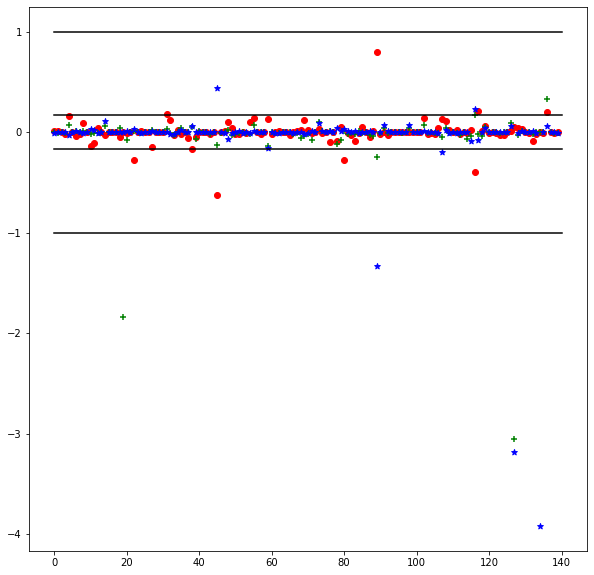

In [347]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(betas.index,betas.loc[:,[0]], color = "red", marker = "o")
plt.scatter(betas.index,betas.loc[:,[1]], color = "green", marker = "+")
plt.scatter(betas.index,betas.loc[:,[2]], color = "blue", marker = "*")

# add a horizontial line in pyplot, using plt.plot((x1, x2), (y1, y2), 'c-')
plt.plot((0, 140), (thresh, thresh), 'k-')
plt.plot((0, 140), (-thresh, -thresh), 'k-')

plt.plot((0, 140), (1, 1), 'k-')
plt.plot((0, 140), (-1, -1), 'k-')

In [349]:
#influence = OLSInfluence(modelo_completo)
## Identificacion de Puntos Influyentes en los coeficientes (DFFITS)
DFF = influence.dffits
#find number of observations
n = len(datos.index)
#calculate DFBETAS threshold value
thresh = 2/((5/n)**(1/2))




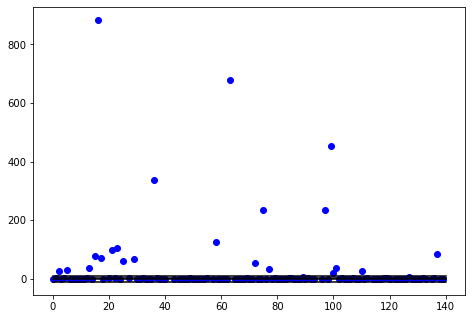

In [350]:
fig, ax = plt.subplots(figsize=(6,4))
ax=fig.add_axes([0,0,1,1])

ax.scatter(DFF[0].index, DFF[0].values, color='b')

plt.plot((0, 140), (thresh, thresh), 'k-')
plt.plot((0, 140), (-thresh, -thresh), 'k-')

plt.plot((0, 140), (1, 1), 'k-')
plt.plot((0, 140), (-1, -1), 'k-')

## Puntos influyentes en las predicciones

In [377]:
influyentes_predicciones = np.where(np.abs(influence.dffits[0])>1)[0]

# Puntos influyentes en los coeficientes

In [374]:
influyentes_coeficientes = np.where(np.abs(influence.dfbetas)>1)[0]

In [378]:
set(influyentes_coeficientes).intersection(set(influyentes_predicciones))

{2, 5, 13, 15, 16, 17, 23, 45, 58, 72, 75, 77, 89, 100, 101, 110, 127, 137}

In [381]:
extremos_influyentes_coeficientes = set(influyentes_coeficientes).intersection(set(outliers))
extremos_influyentes_predicciones = set(influyentes_predicciones).intersection(set(outliers))

In [382]:
extremos_influyentes_coeficientes

{41, 89, 127}

In [383]:
extremos_influyentes_predicciones

{25, 55, 89, 127}

In [386]:
extremos = list(set(list(extremos_influyentes_predicciones)+list(extremos_influyentes_coeficientes)))

In [387]:
datos_sin_extremos = datos.drop(extremos,axis=0)

In [389]:
datos_sin_extremos

modelo_sin_extremos = ols('msrp ~ year + mpgmpge + accelrate + vehicle_model + carclass',data=datos_sin_extremos).fit()

In [390]:
modelo_sin_extremos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     20.16
Date:                Mon, 02 May 2022   Prob (F-statistic):           2.13e-26
Time:                        18:14:19   Log-Likelihood:                -1324.0
No. Observations:                 135   AIC:                             2788.
Df Residuals:                      65   BIC:                             2991.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1.346e+06    5.5e+05      2.447      0.017    2.48e+05    2.44e+06
vehicle_model[T.Accord]          -1.64e+04   1.01e+04     -1.620      0.110   -3.66e+04    3815.509
vehicle_model[T.ActiveHybrid]    3.973e+04   8791.009      4.519      0.000    2.22e+04    5.73e+04
vehicle_model[T.Altima]         -4326.9284   8576.683     -0.504      0.616   -2.15e+04    1.28e+04
vehicle_model[T.Aspen]           8443.4493   1.06e+04      0.798      0.428   -1.27e+04    2.96e+04
vehicle_model[T.Audi]           -2179.6603   1.08e+04     -0.201      0.841   -2.38e+04    1.95e+04
vehicle_model[T.Aura]            2135.4505   9185.276      0.232      0.817   -1.62e+04    2.05e+04
vehicle_model[T.Avante/Elantra]  7151.3581   9823.698      0.728      0.469   -1.25e+04    2.68e+04
vehicle_model[T.Besturn]         6175.0213   8984.839      0.687      0.494   -1.18e+04    2.41e+04
vehicle_model[T.Buick]           7620.3812   9316.345      0.818      0.416    -1.1e+04    2.62e+04
vehicle_model[T.C-Max]          -1.274e+04   1.05e+04     -1.210      0.231   -3.38e+04    8289.891
vehicle_model[T.CR-Z]            1.255e+04   1.02e+04      1.233      0.222   -7782.527    3.29e+04
vehicle_model[T.CT]              1.975e+04   9857.791      2.004      0.049      63.474    3.94e+04
vehicle_model[T.Cadillac]        5.376e+04   9875.864      5.444      0.000     3.4e+04    7.35e+04
vehicle_model[T.Camry]           2588.6379   7699.461      0.336      0.738   -1.28e+04     1.8e+04
vehicle_model[T.Cayenne]         2.675e+04   1.02e+04      2.626      0.011    6406.287    4.71e+04
vehicle_model[T.Chevrolet]       1.466e+04   8875.549      1.652      0.103   -3061.222    3.24e+04
vehicle_model[T.Civic]           9780.0121   7800.998      1.254      0.214   -5799.657    2.54e+04
vehicle_model[T.Crown]           4.712e+04   8983.044      5.245      0.000    2.92e+04    6.51e+04
vehicle_model[T.E400]            2.887e+04   9924.319      2.909      0.005    9048.275    4.87e+04
vehicle_model[T.ES]              1.687e+04   9370.411      1.800      0.077   -1848.681    3.56e+04
vehicle_model[T.Escalade]        4.589e+04   1.03e+04      4.470      0.000    2.54e+04    6.64e+04
vehicle_model[T.Escape]         -3322.5950   8739.834     -0.380      0.705   -2.08e+04    1.41e+04
vehicle_model[T.Estima]          7904.9983   5768.955      1.370      0.175   -3616.400    1.94e+04
vehicle_model[T.F3DM]           -1774.5671   8586.044     -0.207      0.837   -1.89e+04    1.54e+04
vehicle_model[T.Fit]            -5671.7626   5597.357     -1.013      0.315   -1.69e+04    5506.932
vehicle_model[T.Fit/Jazz]        1.046e+04   9550.936      1.095      0.278   -8619.406    2.95e+04
vehicle_model[T.Freed/Freed]     1.078e+04   5607.354      1.923      0.059    -416

In [393]:
influence = modelo_sin_extremos.get_influence()
residuos_train = modelo_sin_extremos.resid

In [391]:
influence = modelo_sin_extremos.get_influence()
#residuos_train = influence.resid_studentized_internal
residuos_train = modelo_sin_extremos.resid
prediccion_train = modelo_sin_extremos.predict(datos)
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

axes[0, 0].scatter(y, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4,color = '#FFB7C5')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4, color = '#FFB7C5')
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.boxplot(
    data    = residuos_train,
    color   = "#FFB7C5",
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = '#FFB7C5',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,color = '#FFB7C5',
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 'Auris' does not match any of the expected levels (expected: ['A5', 'Accord', ..., 'Vue', 'Yukon'])
    msrp ~ year + mpgmpge + accelrate + vehicle_model + carclass
                                        ^^^^^^^^^^^^^

## Detección de puntos extremos en las x´s

con las graficas de dispersión pudimos observar algunos outlier los cuales corresponden a las siguientes observaciones: 
{3, 4, 8, 9, 11, 25, 40, 41, 55, 57, 61, 81, 89, 92, 105, 119, 127, 129}

In [354]:
influence.hat_matrix_diag

array([0.42400255, 0.50080967, 1.        , 0.50223405, 0.44857953,
       1.        , 0.20053565, 0.25881939, 0.33835015, 0.2967661 ,
       0.20915929, 0.26519196, 0.50175096, 1.        , 0.17776895,
       1.        , 1.        , 1.        , 0.34804545, 1.        ,
       0.51862234, 1.        , 0.52876546, 1.        , 0.5034898 ,
       1.        , 1.        , 0.29740901, 1.        , 1.        ,
       0.50061177, 0.25252712, 0.34659932, 0.22113097, 0.36172778,
       0.18269183, 1.        , 0.33989453, 0.21033423, 0.34062007,
       0.15536282, 1.        , 1.        , 0.34341669, 1.        ,
       0.38376003, 0.33868349, 0.34324092, 0.37595659, 0.51592858,
       0.34055118, 0.33449533, 0.33412073, 0.20240993, 0.23881927,
       0.67639229, 1.        , 0.29972359, 1.        , 0.29344887,
       0.20730413, 0.28580064, 0.5034898 , 1.        , 1.        ,
       0.20737928, 0.34036523, 0.50080967, 0.27804271, 0.30102683,
       0.25760575, 0.51862234, 1.        , 0.58842574, 0.38225

In [355]:
p = 6+1
n=140

In [356]:
candidatos_extremos = np.where(influence.hat_matrix_diag > 2*(p/n))[0]

In [357]:
candidatos_extremos.shape

(140,)

In [292]:
set(candidatos_extremos).intersection(set(outliers))

{3, 4, 8, 9, 11, 25, 40, 41, 55, 57, 61, 81, 89, 92, 105, 119, 127, 129}

In [174]:
y.loc[102]

msrp    25200.0
Name: 102, dtype: float64

In [169]:
X.loc[np.where(influence.hat_matrix_diag > 2*5/140)]

,Intercept,carclass[T.L],carclass[T.M],carclass[T.MV],carclass[T.PT],carclass[T.SUV],carclass[T.TS],mpg,accelrate,mpgmpge,year
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,25.00,18.18,25.00,2013.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30.11,9.52,85.00,2008.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,22.11,20.41,22.11,2010.0
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,22.00,11.76,22.00,2010.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41.26,7.46,41.26,1997.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.00,11.11,98.00,2013.0
11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,17.00,11.11,17.00,2005.0
20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,37.00,9.24,37.00,2010.0
21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.10,8.20,54.10,2000.0
23,1.0,0.0,0.0,1.0,0.0,0.0,0.0,58.80,7.52,58.80,2011.0


In [149]:
#OLSInfluence.dffits(results)
res = SimpleTable(modelo_completo)
#OLSInfluence.summary_table(res, alpha=0.05)


TypeError: object of type 'RegressionResultsWrapper' has no len()

# verificamos que se cumplen los supuestos
# supuesto de heterocedasticidad

In [137]:
from statsmodels.graphics import utils
from statsmodels.tools.tools import maybe_unwrap_results

Text(0, 0.5, 'resid')

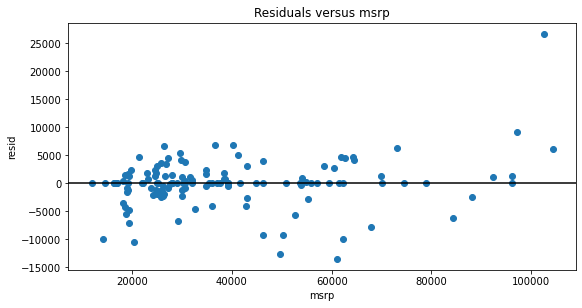

In [403]:
endog_idx = 'msrp'
fig = None
fig = utils.create_mpl_fig(fig,figsize=(20, 10))
#exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, modelo_sin_extremos.model)
results = maybe_unwrap_results(modelo_sin_extremos)

y_name = results.model.endog_names
x1 = results.model.endog[:,]
ax = fig.add_subplot(2, 2, 2)
ax.plot(x1, results.resid, 'o')
ax.axhline(y=0, color='black')
ax.set_title('Residuals versus %s' % y_name, fontsize='large')
ax.set_xlabel(y_name)
ax.set_ylabel("resid")

In [401]:
results.model.endog[:,]

array([ 84300.  ,  60519.83,  62290.38,  23744.06, 104300.43,  39250.  ,
        19006.62,  38454.56,  24509.74,  39145.  ,  14071.92,  32647.26,
        29524.75,  39172.44,  61132.11,  78932.81,  74425.  ,  44903.77,
        19322.56,  11849.43,  21435.54,  35354.97,  40170.  ,  16394.36,
        25900.  ,  35787.29,  70157.02,  41135.  ,  32050.  ,  53620.  ,
        54750.  ,  26832.25,  36676.1 ,  27272.28,  27200.  ,  24641.18,
        50900.  ,  62575.  ,  19080.  ,  61400.  ,  30588.35,  31739.55,
        59450.  ,  54145.  ,  37510.86,  64547.56,  26213.09,  96208.93,
        30082.16,  24768.79,  34858.84,  50149.39,  25650.  ,  19137.01,
        25833.38,  32950.  ,  96150.  ,  30089.64,  21872.71,  49650.  ,
        19387.76,  39261.96,  26549.16,  57094.81,  41555.  ,  19036.71,
        34748.52,  55164.33,  18600.  ,  29853.25,  19859.16,  19402.8 ,
        17045.06,  42924.35,  28033.51,  46229.48,  24999.59,  22110.87,
        67902.28,  73183.47,  29186.21,  32095.61, 

In [140]:
fig = utils.create_mpl_fig(fig,figsize=(8, 6))

In [177]:
results.model.endox_names

AttributeError: 'OLS' object has no attribute 'endox_names'